# Lezione 11

## Dario Pullia

Esempio del prof

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import get_custom_objects
import numpy as np
import matplotlib.pyplot as plt

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect



# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

# compose the NN model


model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


# return weights and biases
model.get_weights()


# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

/home/dario/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dario/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dario/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dario/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

<Figure size 640x480 with 1 Axes>

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 500 samples, validate on 50 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
500/500 [==============================] - 0s 222us/sample - loss: 2.1186 - mean_squared_error: 2.1186 - val_loss: 1.5351 - val_mean_squared_error: 1.5351
Epoch 2/30
500/500 [==============================] - 0s 38us/sample - loss: 1.4994 - mean_squared_error: 1.4994 - val_loss: 1.1134 - val_mean_squared_error: 1.1134
Epoch 3/30
500/500 [==============================] - 0s 54us/sample - loss: 1.1000 - mean_squared_error: 1.1000 - val_loss: 0.8329 

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### Esercizio 11.1

Spiegazioni varie


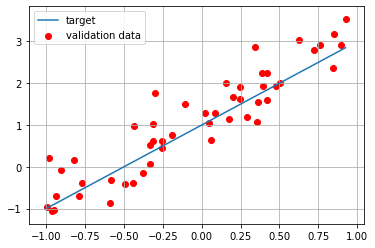

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 500 samples, validate on 50 samples
Epoch 1/30
500/500 [==============================] - 0s 182us/sample - loss: 3.5904 - mean_squared_error: 3.5904 - val_loss: 3.0155 - val_mean_squared_error: 3.0155
Epoch 2/30
500/500 [==============================] - 0s 26us/sample - loss: 2.7531 - mean_squared_error: 2.7531 - val_loss: 2.3508 - val_mean_squared_error: 2.3508
Epoch 3/30
500/500 [==============================] - 0s 35us/sample - loss: 2.1710 - mean_squared_error: 2.1710 - val_loss: 1.8670 - val_mean_squared_error: 1.8670
Epoch 4/30
500/500 [==============================] - 0s 42us/sample - loss: 1.7422 - mean_squared_error: 1.7422 - val_loss: 1.5118 - v

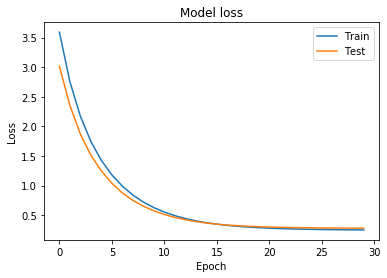

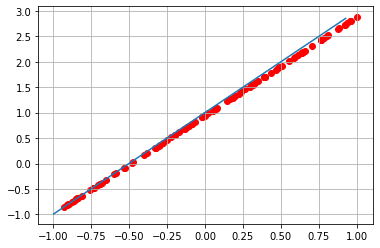

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect



# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

# compose the NN model


model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


# return weights and biases
model.get_weights()


# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Esercizio 11.2

Spiegazioni varie

Perchè tanh e sigmoid fanno cagare? Perchè sono limitate a 1! Quasi tutti i miei input sono superiori a 2.5 e questo nella funzione di attivazione è greve perchè mi lascia uno spazio minimo sulle y per imparare. Detto in altro modo, da un certo punto in poi il gradiente rimane quasi zero ed è un casino da minimizzare. Oggi tutti usano RELU o similRELU

Cazzata? Non troppo, ma noto che se metto linear alla fine molti molti problemi si risolvono. L'output non può essere limitato altrimenti darà 1 fisso, pirlone


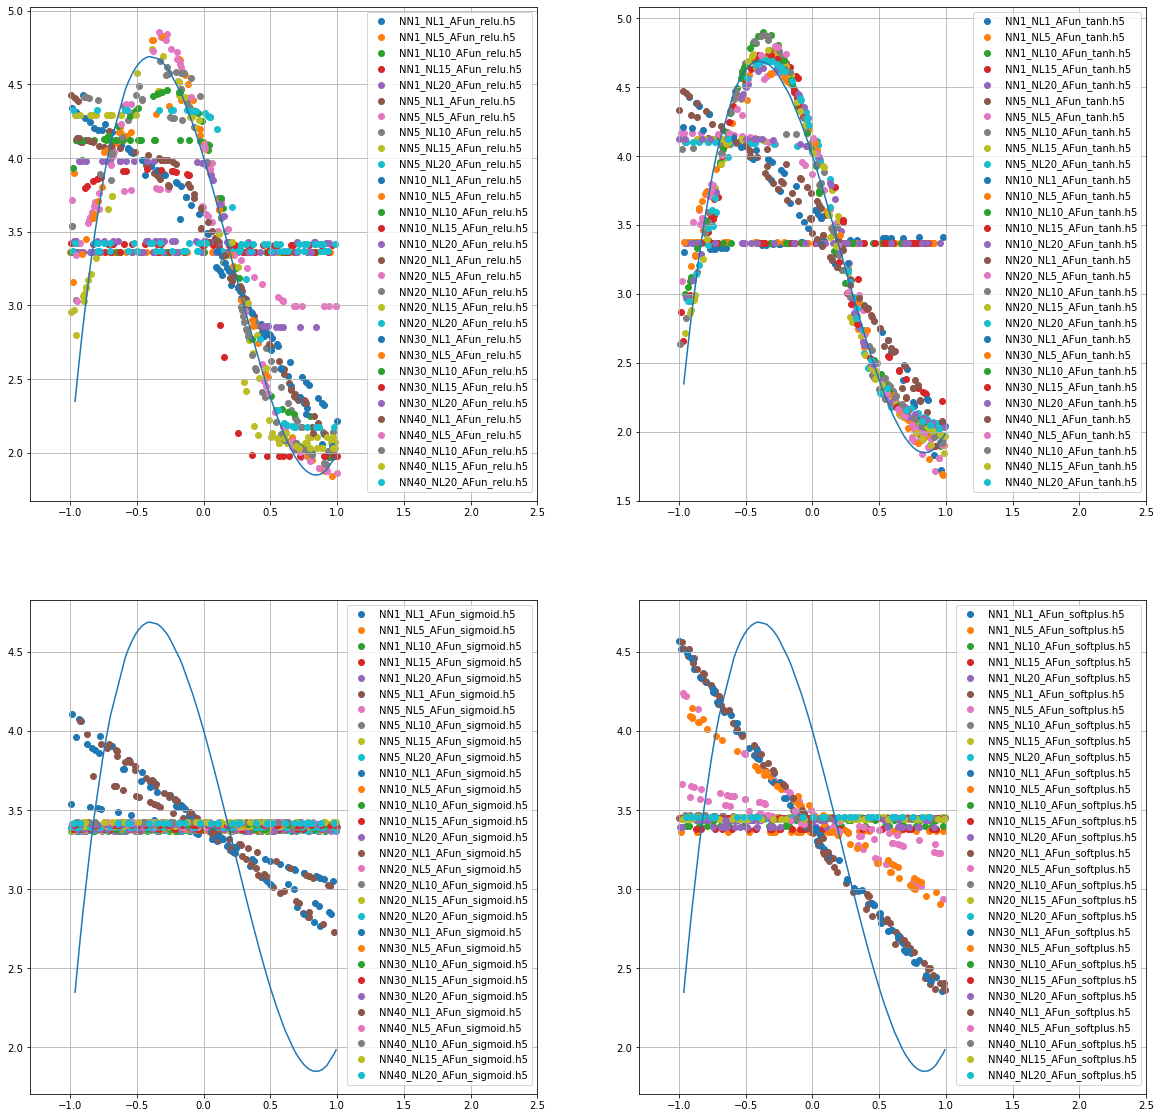

In [3]:
NN=[1,5,10,20,30,40]
NL=[1,5,10,15,20]
AFun=['relu','sigmoid','tanh','softplus']
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = 4-3*x_valid-2*x_valid**2+3*x_valid**3 # ideal (target) polinomial function

fig, ax = plt.subplots(2,2,figsize=(20, 20))


plt.xlim([-1.3, 2.5])

for i in NN:
    for j in NL:
        for k,fun in enumerate(AFun):
            K.clear_session()
            save_model_path='data02/models/model_NN%d_NL%d_AFun_%s.h5'%(i,j,fun)
            model= keras.models.load_model(filepath=save_model_path)
            x_predicted = np.random.uniform(-1, 1, 30)
            y_predicted = model.predict(x_predicted)
            ax[k%2][int(k/2)%2].scatter(x_predicted, y_predicted,label='NN%d_NL%d_AFun_%s.h5'%(i,j,fun))

for k,fun in enumerate(AFun):
    ax[k%2][int(k/2)%2].plot(x_valid, y_target)
    ax[k%2][int(k/2)%2].grid(True)
    ax[k%2][int(k/2)%2].legend()
    ax[k%2][int(k/2)%2].set_xlim([-1.3, 2.5])

    
plt.show()

Scelgo relu. La studio meglio

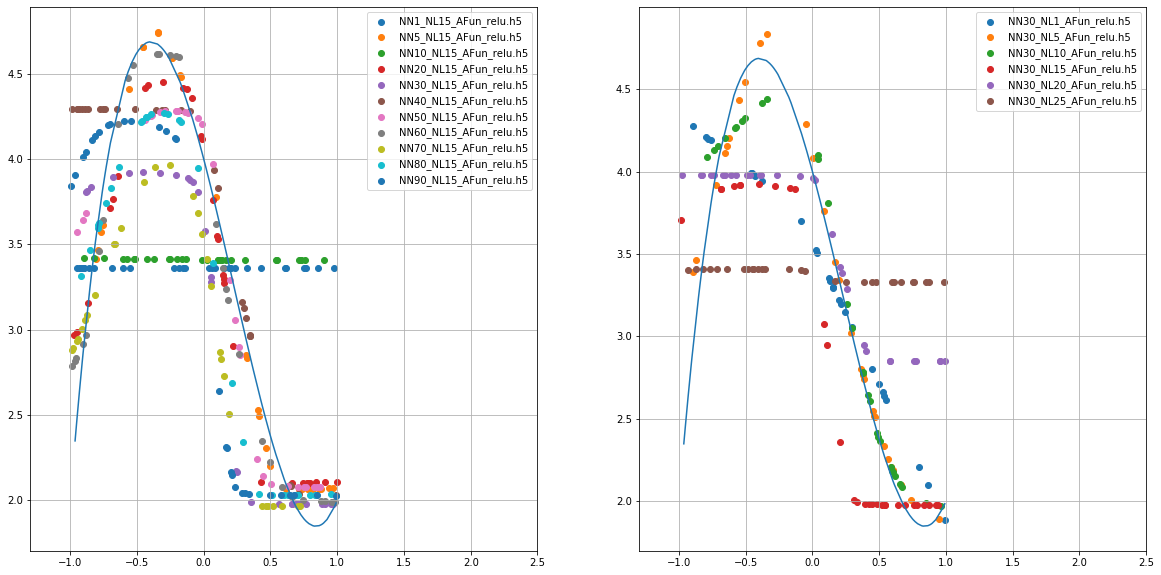

In [12]:
NN=[1,5,10,20,30,40,50,60,70,80,90]
NL=[1,5,10,15,20,25]
fig, ax = plt.subplots(1,2,figsize=(20, 10))


plt.xlim([-1.3, 2.5])
fun='relu'
for i in NN: #Esploro il comportamento con un numero fisso di layer
    #for j in NL:
    j=15
    K.clear_session()
    save_model_path='data02/models/model_NN%d_NL%d_AFun_%s.h5'%(i,j,fun)
    model= keras.models.load_model(filepath=save_model_path)
    x_predicted = np.random.uniform(-1, 1, 30)
    y_predicted = model.predict(x_predicted)
    ax[0].scatter(x_predicted, y_predicted,label='NN%d_NL%d_AFun_%s.h5'%(i,j,fun))

#for i in NN:
for j in NL: #Esploro il comportamento con un numero fisso di neuroni per layer
    i=30
    K.clear_session()
    save_model_path='data02/models/model_NN%d_NL%d_AFun_%s.h5'%(i,j,fun)
    model= keras.models.load_model(filepath=save_model_path)
    x_predicted = np.random.uniform(-1, 1, 30)
    y_predicted = model.predict(x_predicted)
    ax[1].scatter(x_predicted, y_predicted,label='NN%d_NL%d_AFun_%s.h5'%(i,j,fun))
    
    
    
for k in range(2):
    ax[k].plot(x_valid, y_target)
    ax[k].grid(True)
    ax[k].legend()
    ax[k].set_xlim([-1.3, 2.5])

    
plt.show()

100/100 [==============================] - 0s 773us/sample - loss: 0.2511 - mean_squared_error: 0.2511


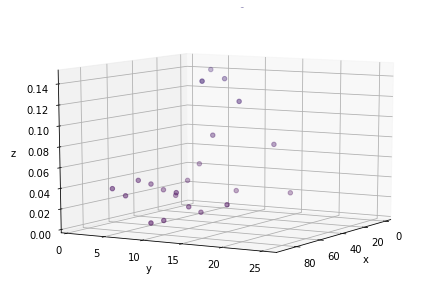

In [13]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib qt #Commentare e scommentare per vedere il 3d vero
fun='relu'


X=[]
Y=[]
Z=[]


for i in NN: #Esploro il comportamento con un numero fisso di layer
    for j in NL:
        K.clear_session()
        save_model_path='data02/models/model_NN%d_NL%d_AFun_%s.h5'%(i,j,fun)
        model= keras.models.load_model(filepath=save_model_path)
        score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
        X.append(i)
        Y.append(j)
        Z.append(score[0])


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.set_zscale('')
ax.set_zlim([0.,0.15])
ax.view_init(10, 30)
plt.show()

Scelgo la combinazione 10 layers, 50 neuroni

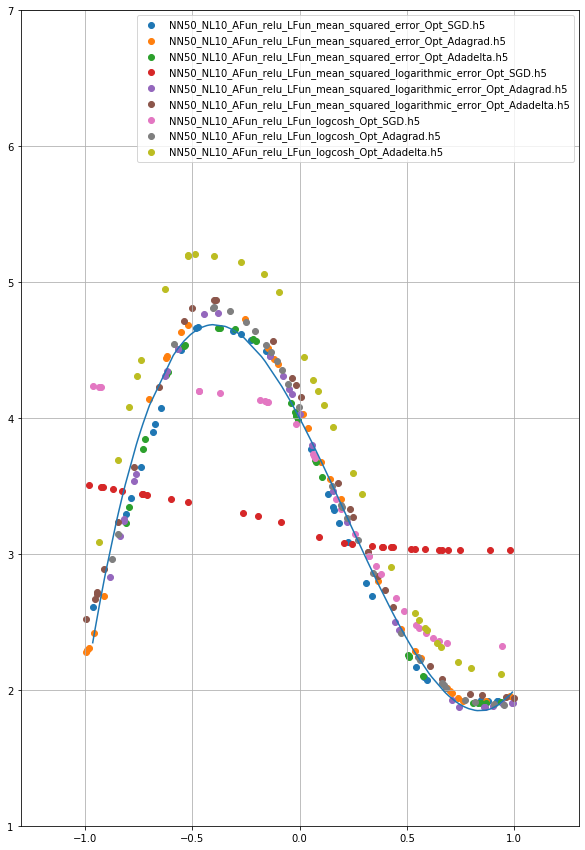

In [10]:
NN=[50]
NL=[10]
AFun=['relu']
LFun=['mean_squared_error','mean_squared_logarithmic_error','logcosh',]
Opt=['SGD','Adagrad','Adadelta']

fig = plt.figure(figsize=(10, 15))



for i in NN:
    for j in NL:
        for k in AFun:
            for m in LFun:
                for n in Opt:
                    K.clear_session()
                    save_model_path='data02/models/model_NN%d_NL%d_AFun_%s_LFun_%s_Opt_%s.h5'%(i,j,k,m,n)
                    model= keras.models.load_model(filepath=save_model_path)
                    x_predicted = np.random.uniform(-1, 1, 30)
                    y_predicted = model.predict(x_predicted)
                    plt.scatter(x_predicted, y_predicted,label='NN%d_NL%d_AFun_%s_LFun_%s_Opt_%s.h5'%(i,j,k,m,n))

plt.plot(x_valid, y_target)
plt.grid(True)
plt.legend()
plt.xlim([-1.3, 1.3])    
plt.ylim([1, 7])    
NN=[50]
NL=[10]
AFun=['relu']
LFun=['mean_squared_error','mean_squared_logarithmic_error','logcosh',]
Opt=['SGD','Adagrad','Adadelta']
plt.show()

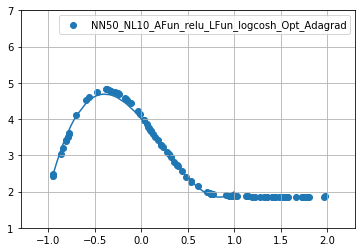

In [20]:
NN=[50]
NL=[10]
AFun=['relu']
LFun=['mean_squared_error','mean_squared_logarithmic_error','logcosh',]
Opt=['SGD','Adagrad','Adadelta']


save_model_path='data02/models/model_NN50_NL10_AFun_relu_LFun_logcosh_Opt_Adagrad.h5'
model= keras.models.load_model(filepath=save_model_path)
x_predicted = np.random.uniform(-1, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,label='NN50_NL10_AFun_relu_LFun_logcosh_Opt_Adagrad')

plt.plot(x_valid, y_target)
plt.grid(True)
plt.legend()
plt.xlim([-1.3, 2.3])    
plt.ylim([1, 7])    
plt.show()